In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.covariance import EllipticEnvelope
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



data = pd.read_csv("/content/train_FD001.txt",sep="\s+",header=None)


In [2]:
ENAMING_DICT = {0: "engine_num",1:"cycle_num",2:"oper_set_1",3:"oper_set_2",4:"oper_set_3",5:"temp_fan_inlet",
                 6:"temp_lpc_outlet",7:"temp_hpc_outlet",8:"temp_lpt_outlet",9:"px_fan_inlet",10:"px_by_duct",11:"px_hpc_outlet",
                 12:"phys_fan_speed",13:"phys_core_speed",14:"engine_px_ratio",15:"stat_px_hpc_out",16:"fuel_flow_ratio",17:"corr_fan_speed",
                 18:"corr_core_speed",19:"bypass_ratio",20:"fuel_air_ratio",21:"bleed_enthalpy",22:"demanded_fan_speed",23:"demanded_corr_fan_speed",
                 24:"hpt_coolant_bleed",25:"lpt_coolant_bleed"}

In [3]:
train_001 = pd.read_csv("/content/train_FD001.txt",sep="\s+",header=None)
train_001


,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640


In [4]:
data.rename(columns=ENAMING_DICT, inplace=True)

# Verify column names
print("Columns in DataFrame:", data.columns)

Columns in DataFrame: Index(['engine_num', 'cycle_num', 'oper_set_1', 'oper_set_2', 'oper_set_3',
       'temp_fan_inlet', 'temp_lpc_outlet', 'temp_hpc_outlet',
       'temp_lpt_outlet', 'px_fan_inlet', 'px_by_duct', 'px_hpc_outlet',
       'phys_fan_speed', 'phys_core_speed', 'engine_px_ratio',
       'stat_px_hpc_out', 'fuel_flow_ratio', 'corr_fan_speed',
       'corr_core_speed', 'bypass_ratio', 'fuel_air_ratio', 'bleed_enthalpy',
       'demanded_fan_speed', 'demanded_corr_fan_speed', 'hpt_coolant_bleed',
       'lpt_coolant_bleed'],
      dtype='object')


In [5]:
if 'engine_num' in data.columns and 'cycle_num' in data.columns: # Preprocess the data and it will check that the other columns are present in the data column using
#  scalarr standard
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data.drop(columns=["engine_num", "cycle_num",]))

In [6]:
# in this column nan values will be detect,,,, there should be no Nan value in data

required_columns = ["engine_num", "cycle_num"]
if all(col in data.columns for col in required_columns):

    if data.isna().sum().sum() == 0:

        scaler = StandardScaler()
        try:
            data_scaled = scaler.fit_transform(data.drop(columns=["engine_num", "cycle_num"]))
            print("Data scaling successful.")
        except KeyError as e:
            print(f"Error during scaling: {e}")

Data scaling successful.


In [7]:
engine_groups = train_001.groupby(0) # this line group the train001 dataframe by first column engine no

In [8]:
# in this code i make a directory of data which i saved in input_data_windowmore_30 if it does not exist
import os

output_dir_30 = '../input_data_windowmore30'

os.makedirs(output_dir_30, exist_ok=True)

for engine_num, group in engine_groups:
    filename = f'engine_{int(engine_num)}.csv'
    group.to_csv(f'{output_dir_30}/{filename}', index=False, header=False)

print(f'Files have been saved in {output_dir_30} directory.')

Files have been saved in ../input_data_windowmore30 directory.


In [9]:
# in this code i make a directory of data which i saved in input_data_window_1 if it does not exist
output_dir_1 = '../input_data_window_1'

# Create the directory if it doesn't exist
os.makedirs(output_dir_1, exist_ok=True)

for index, row in train_001.iterrows():
    row_df = row.to_frame().T
    filename = f'engine_{int(row[0])}_cycle_{int(row[1])}.csv'
    row_df.to_csv(f'{output_dir_1}/{filename}', index=False, header=False)

print(f'Files have been saved in {output_dir_1} directory.')

Files have been saved in ../input_data_window_1 directory.


In [10]:

# in this code i make a directory of data which i saved in input_data_windowmore_5 if it does not exist
output_dir_5 = '../input_data_window_5'

# Create the directory if it doesn't exist
os.makedirs(output_dir_5, exist_ok=True)

for engine_num, group in engine_groups:
    num_rows = len(group)
    for start in range(0, num_rows - num_rows % 5, 5):
        window = group.iloc[start:start + 5]
        if len(window) == 5:
            filename = f'engine_{int(engine_num)}_cycle_{int(window.iloc[0][1])}_to_{int(window.iloc[-1][1])}.csv'
            window.to_csv(f'{output_dir_5}/{filename}', index=False, header=False)

print(f'Files have been saved in {output_dir_5} directory.')


Files have been saved in ../input_data_window_5 directory.


In [11]:
# in this code i make a directory of data which i saved in input_data_windowmore_10 if it does not exist
output_dir_10 = '../input_data_window_10'

# Create the directory if it doesn't exist
os.makedirs(output_dir_10, exist_ok=True)

for engine_num, group in engine_groups:
    num_rows = len(group)
    # Only process groups with at least 10 rows
    for start in range(0, num_rows - num_rows % 10, 10):
        window = group.iloc[start:start + 10]
        if len(window) == 10:
            filename = f'engine_{int(engine_num)}_cycle_{int(window.iloc[0][1])}_to_{int(window.iloc[-1][1])}.csv'
            window.to_csv(f'{output_dir_10}/{filename}', index=False, header=False)

print(f'Files have been saved in {output_dir_10} directory.')


Files have been saved in ../input_data_window_10 directory.


In [12]:
# in this code i make a directory of data which i saved in input_data_window_30 if it does not exist
output_dir_30 = '../input_data_window_30'

# Create the directory if it doesn't exist
os.makedirs(output_dir_30, exist_ok=True)

for engine_num, group in engine_groups:
    num_rows = len(group)
    for start in range(0, num_rows - num_rows % 30, 30):
        window = group.iloc[start:start + 30]
        if len(window) == 30:
            filename = f'engine_{int(engine_num)}_cycle_{int(window.iloc[0][1])}_to_{int(window.iloc[-1][1])}.csv'
            window.to_csv(f'{output_dir_30}/{filename}', index=False, header=False)

print(f'Files have been saved in {output_dir_30} directory.')


Files have been saved in ../input_data_window_30 directory.


In [13]:
input_dir = '../input_data_window_1'

# List all CSV files in the directory
files = [f for f in os.listdir(input_dir) if f.endswith('.csv')]

# csv reads into a sepreate pandas dataframe
data_frames = [pd.read_csv(os.path.join(input_dir, file), header=None) for file in files]


data = pd.concat(data_frames, ignore_index=True)# individual dtaframe cocentrated into a single dataframe for processing.

# StandardScaler is used to normalize the data and guarantee that its mean is 0 and its standard deviation is 1,
# Numerous machine learning techniques, such as anomaly detection, depend on this.
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# The starting point of the Isolation Forest model is a predetermined contamination rate, or the percentage of expected abnormalities in the data,
#  Next, using the scaled data, the model is fitted or trained.
model = IsolationForest(contamination=0.01)  #expecting 1% of data points are anomalies

# Fit the model
model.fit(data_scaled)

# Anomalies in the scaled data are predicted by the trained model. With the addition of the predictions,
# the original DataFrame now has a new column called anomaly, where 1 denotes normal data and -1 an anomaly.

predictions = model.predict(data_scaled)
# -1 indicates an anomaly, 1 indicates normal
data['anomaly'] = predictions
# A new CSV file is created and contains the DataFrame with the anomaly detection results.
# The DataFrame is written to this file without including the index, and the file path is specified.

results_file = '../input_data_window_1_with_anomalies.csv'
data.to_csv(results_file, index=False)

print(f'Anomaly detection results have been saved to {results_file}')

Anomaly detection results have been saved to ../input_data_window_1_with_anomalies.csv


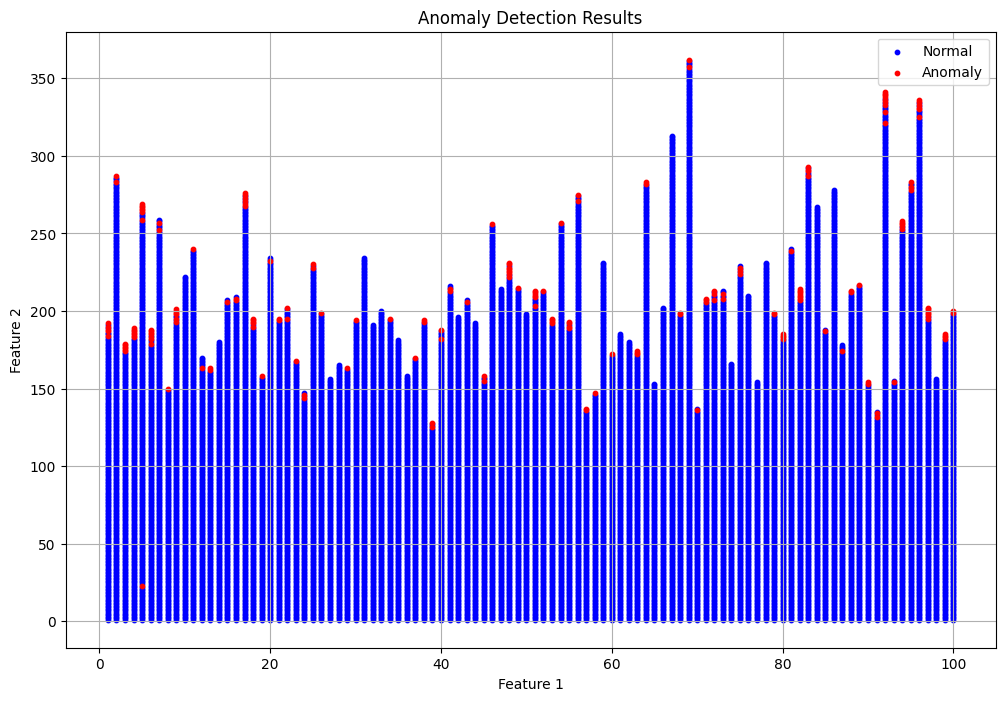

<Figure size 640x480 with 0 Axes>

In [14]:
input_dir = '../input_data_window_1'

files = [f for f in os.listdir(input_dir) if f.endswith('.csv')]

data_frames = [pd.read_csv(os.path.join(input_dir, file), header=None) for file in files]

data = pd.concat(data_frames, ignore_index=True)

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

model = IsolationForest(contamination=0.01)
model.fit(data_scaled)

predictions = model.predict(data_scaled)

data['anomaly'] = predictions

plt.figure(figsize=(12, 8))

#  -1 indicates an anomaly, 1 indicates normal
normal_data = data[data['anomaly'] == 1]
plt.scatter(normal_data[0], normal_data[1], color='blue', label='Normal', s=10)

# Ploting the anomaly data points
anomaly_data = data[data['anomaly'] == -1]
plt.scatter(anomaly_data[0], anomaly_data[1], color='red', label='Anomaly', s=10)

# lebeliing and legending
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Anomaly Detection Results')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

# Optionally, save the plot to a file
plt.savefig('../input_data_window_1_anomaly_detection_plot.png')

In [15]:
input_dir = '../input_data_window_30'

files = [f for f in os.listdir(input_dir) if f.endswith('.csv')]

data_frames = [pd.read_csv(os.path.join(input_dir, file), header=None) for file in files]

data = pd.concat(data_frames, ignore_index=True)

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

model = IsolationForest(contamination=0.01)


model.fit(data_scaled)

predictions = model.predict(data_scaled)
data['anomaly'] = predictions

# Save results to a new CSV file
results_file = '../input_data_window_30_with_anomalies.csv'
data.to_csv(results_file, index=False)

print(f'Anomaly detection results have been saved to {results_file}')

Anomaly detection results have been saved to ../input_data_window_30_with_anomalies.csv


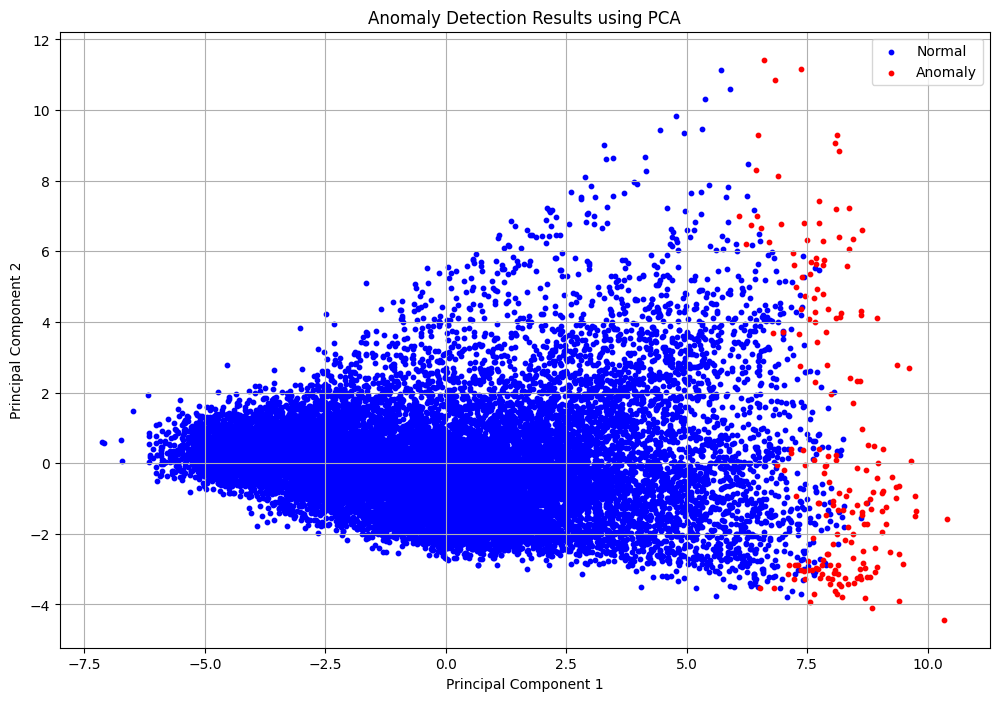

<Figure size 640x480 with 0 Axes>

In [16]:

from sklearn.decomposition import PCA

input_dir = '../input_data_window_30'

files = [f for f in os.listdir(input_dir) if f.endswith('.csv')]

data_frames = [pd.read_csv(os.path.join(input_dir, file), header=None) for file in files]

data = pd.concat(data_frames, ignore_index=True)

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

model = IsolationForest(contamination=0.01)
model.fit(data_scaled)


predictions = model.predict(data_scaled)
data['anomaly'] = predictions


pca = PCA(n_components=2)  #reason to choose 2 is PCA reduce the data to 2 principal components.
data_pca = pca.fit_transform(data_scaled)

#creating a DataFrame for PCA results
data_pca_df = pd.DataFrame(data_pca, columns=['PC1', 'PC2'])
data_pca_df['anomaly'] = data['anomaly']

# Scatter Ploting
plt.figure(figsize=(12, 8))

# Plot normal data points
normal_data = data_pca_df[data_pca_df['anomaly'] == 1]
plt.scatter(normal_data['PC1'], normal_data['PC2'], color='blue', label='Normal', s=10)

# Plot data points having anomalies
anomaly_data = data_pca_df[data_pca_df['anomaly'] == -1]
plt.scatter(anomaly_data['PC1'], anomaly_data['PC2'], color='red', label='Anomaly', s=10)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Anomaly Detection Results using PCA')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

# Optionally, save the plot to a file
plt.savefig('../input_data_window_30_anomaly_detection_pca_plot.png')

In [17]:
input_dir = '../input_data_window_5'

files = [f for f in os.listdir(input_dir) if f.endswith('.csv')]

data_frames = [pd.read_csv(os.path.join(input_dir, file), header=None) for file in files]

data = pd.concat(data_frames, ignore_index=True)

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

model = IsolationForest(contamination=0.01)  # Adjust contamination based on expected anomaly rate

model.fit(data_scaled)

predictions = model.predict(data_scaled)
# -1 indicates an anomaly, 1 indicates normal
data['anomaly'] = predictions

# csv results saving
results_file = '../input_data_window_30_with_anomalies.csv'
data.to_csv(results_file, index=False)

print(f'Anomaly detection results have been saved to {results_file}')

Anomaly detection results have been saved to ../input_data_window_30_with_anomalies.csv


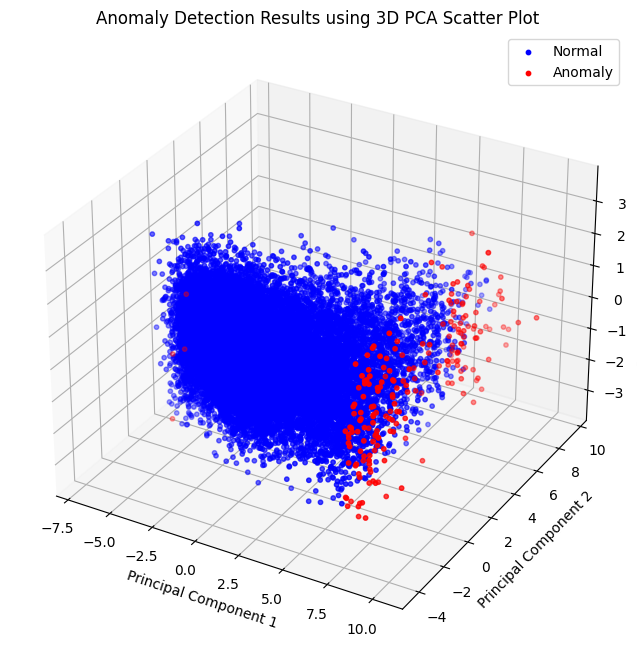

<Figure size 640x480 with 0 Axes>

In [18]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os

# Define input directory
input_dir = '../input_data_window_5'

# List all CSV files in the input directory
files = [f for f in os.listdir(input_dir) if f.endswith('.csv')]

# Read all CSV files into DataFrames
data_frames = [pd.read_csv(os.path.join(input_dir, file), header=None) for file in files]

# Concatenate all DataFrames into a single DataFrame
data = pd.concat(data_frames, ignore_index=True)

# Scale the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Initialize PCA with 3 components
pca = PCA(n_components=3)
data_pca = pca.fit_transform(data_scaled)

# Fit the Isolation Forest model
model = IsolationForest(contamination=0.01)
model.fit(data_scaled)

# Make predictions
predictions = model.predict(data_scaled)
# -1 indicates an anomaly, 1 indicates normal
data['anomaly'] = predictions

# Create DataFrame for PCA data
data_pca_df = pd.DataFrame(data_pca, columns=['PC1', 'PC2', 'PC3'])
data_pca_df['anomaly'] = data['anomaly']

# Create 3D scatter plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot normal data points
normal_data = data_pca_df[data_pca_df['anomaly'] == 1]
ax.scatter(normal_data['PC1'], normal_data['PC2'], normal_data['PC3'], color='blue', label='Normal', s=10)

# Plot anomaly data points
anomaly_data = data_pca_df[data_pca_df['anomaly'] == -1]
ax.scatter(anomaly_data['PC1'], anomaly_data['PC2'], anomaly_data['PC3'], color='red', label='Anomaly', s=10)

# Set labels and title
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('Anomaly Detection Results using 3D PCA Scatter Plot')
ax.legend()

# Show plot
plt.show()

# Optionally, save the plot to a file
plt.savefig('../input_data_window_5_anomaly_detection_3d_pca_plot.png')

In [19]:
input_dir = '../input_data_window_10'

files = [f for f in os.listdir(input_dir) if f.endswith('.csv')]

data_frames = [pd.read_csv(os.path.join(input_dir, file), header=None) for file in files]

data = pd.concat(data_frames, ignore_index=True)

# Standardize is important for anomaly detection, Assuming data have no headers or specific labels.

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)


# Initialize Isolation Forest & train the anomaly detection Model
model = IsolationForest(contamination=0.01)

# Fit the model
model.fit(data_scaled)

# Apply the Model and Detect Anomalies
# Predict anomalies
predictions = model.predict(data_scaled)
# -1 indicates an anomaly, 1 indicates normal
data['anomaly'] = predictions

# Save results to a new CSV file
results_file = '../input_data_window_10_with_anomalies.csv'
data.to_csv(results_file, index=False)

print(f'Anomaly detection results have been saved to {results_file}')

Anomaly detection results have been saved to ../input_data_window_10_with_anomalies.csv


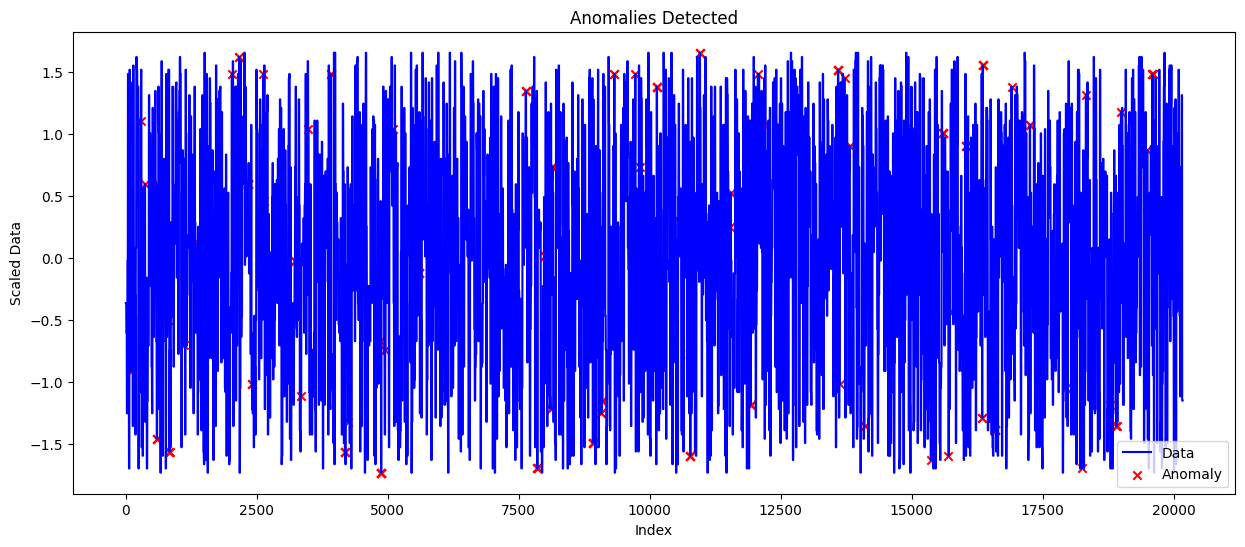

<Figure size 640x480 with 0 Axes>

In [20]:
input_dir = '../input_data_window_10'

# List all CSV files in the directory
files = [f for f in os.listdir(input_dir) if f.endswith('.csv')]

# Load all data into a list of DataFrames
data_frames = [pd.read_csv(os.path.join(input_dir, file), header=None) for file in files]

# Concatenate all DataFrames into a single DataFrame
data = pd.concat(data_frames, ignore_index=True)

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Train Anomaly Detection Model
model = IsolationForest(contamination=0.01)
model.fit(data_scaled)

# Detection of anomalies
predictions = model.predict(data_scaled)
data['anomaly'] = predictions

# Plot the actual data and highlight the anomalies
plt.figure(figsize=(15, 6))
plt.plot(data.index, data_scaled[:, 0], label='Data', color='blue')
anomalies = data[data['anomaly'] == -1]
plt.scatter(anomalies.index, data_scaled[anomalies.index, 0], color='red', label='Anomaly', marker='x')
plt.title('Anomalies Detected')
plt.xlabel('Index')
plt.ylabel('Scaled Data')
plt.legend()
plt.show()

# Optionally, save the plot to a file
plt.savefig('../input_data_window_10_anomaly_detection_scatter_plot.png')

Epoch 1/50
516/516 [==============================] - 3s 4ms/step - loss: 0.3503 - val_loss: 0.1906
Epoch 2/50
516/516 [==============================] - 2s 4ms/step - loss: 0.1724 - val_loss: 0.1430
Epoch 3/50
516/516 [==============================] - 1s 2ms/step - loss: 0.1386 - val_loss: 0.1225
Epoch 4/50
516/516 [==============================] - 1s 2ms/step - loss: 0.1205 - val_loss: 0.1137
Epoch 5/50
516/516 [==============================] - 1s 3ms/step - loss: 0.1139 - val_loss: 0.1098
Epoch 6/50
516/516 [==============================] - 1s 2ms/step - loss: 0.1100 - val_loss: 0.1061
Epoch 7/50
516/516 [==============================] - 1s 3ms/step - loss: 0.1056 - val_loss: 0.1012
Epoch 8/50
516/516 [==============================] - 1s 3ms/step - loss: 0.1005 - val_loss: 0.0966
Epoch 9/50
516/516 [==============================] - 1s 2ms/step - loss: 0.0969 - val_loss: 0.0948
Epoch 10/50
516/516 [==============================] - 1s 3ms/step - loss: 0.0951 - val_loss: 0.0933

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


645/645 [==============================] - 2s 2ms/step
Anomaly detection results have been saved to isolation_forest_AD_input_data_with_anomalies.csv


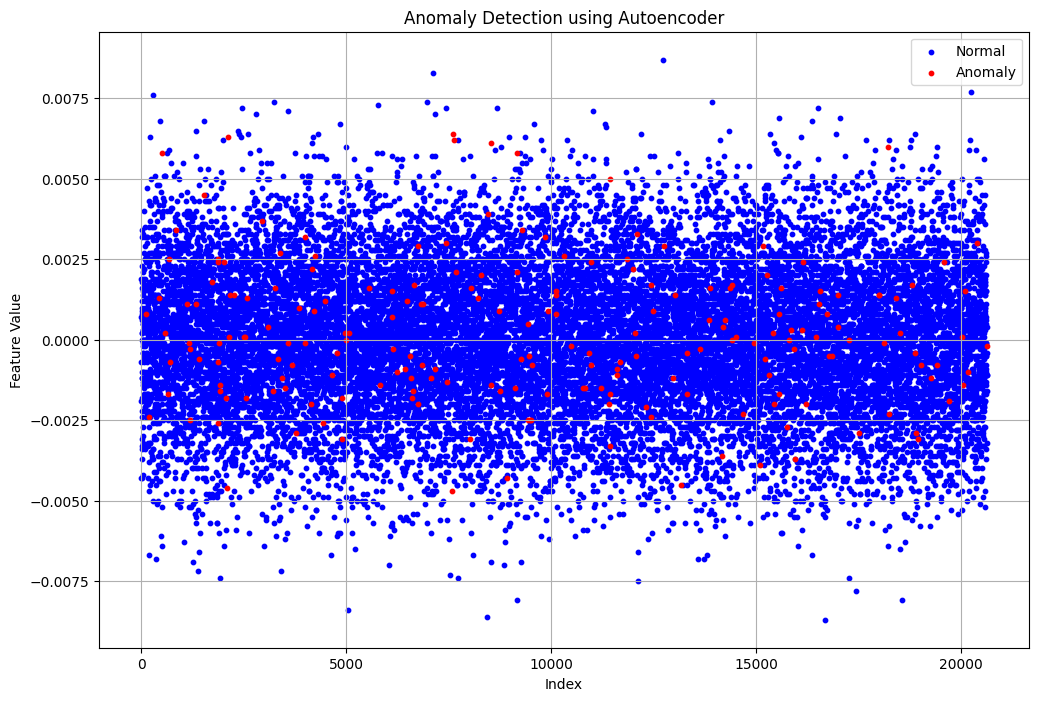

<Figure size 640x480 with 0 Axes>

In [25]:
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
import pickle
import joblib

# Load the data
data = pd.read_csv("/content/train_FD001.txt", sep="\s+", header=None)
ENAMING_DICT = {
    0: "engine_num", 1: "cycle_num", 2: "oper_set_1", 3: "oper_set_2", 4: "oper_set_3",
    5: "temp_fan_inlet", 6: "temp_lpc_outlet", 7: "temp_hpc_outlet", 8: "temp_lpt_outlet",
    9: "px_fan_inlet", 10: "px_by_duct", 11: "px_hpc_outlet", 12: "phys_fan_speed", 13: "phys_core_speed",
    14: "engine_px_ratio", 15: "stat_px_hpc_out", 16: "fuel_flow_ratio", 17: "corr_fan_speed",
    18: "corr_core_speed", 19: "bypass_ratio", 20: "fuel_air_ratio", 21: "bleed_enthalpy",
    22: "demanded_fan_speed", 23: "demanded_corr_fan_speed", 24: "hpt_coolant_bleed", 25: "lpt_coolant_bleed"
}
data.rename(columns=ENAMING_DICT, inplace=True)

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.drop(columns=["engine_num", "cycle_num"]))

# Define the autoencoder model
input_dim = data_scaled.shape[1]
encoding_dim = 14

input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation="tanh")(input_layer)
encoder = Dense(7, activation="relu")(encoder)
decoder = Dense(encoding_dim, activation="tanh")(encoder)
decoder = Dense(input_dim, activation="linear")(decoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder
autoencoder.fit(data_scaled, data_scaled, epochs=50, batch_size=32, shuffle=True, validation_split=0.2)

# Save the trained model as .h5
autoencoder.save('isolation_forest_AD_model.h5')
print("Model saved as isolation_forest_AD_model.h5")

# Save the trained model as .pkl using pickle
with open('isolation_forest_AD_model.pkl', 'wb') as file:
    pickle.dump(autoencoder, file)
print("Model saved as isolation_forest_AD_model.pkl")

# Save the trained model as .joblib using joblib
joblib.dump(autoencoder, 'isolation_forest_AD_model.joblib')
print("Model saved as isolation_forest_AD_model.joblib")

# Use the autoencoder to reconstruct the data
reconstructions = autoencoder.predict(data_scaled)
mse = np.mean(np.power(data_scaled - reconstructions, 2), axis=1)

# Determine the threshold for anomalies
threshold = np.percentile(mse, 99)
anomalies = mse > threshold

# Add the anomalies to the original dataframe
data['anomaly'] = anomalies.astype(int)

# Save the results
results_file = 'isolation_forest_AD_input_data_with_anomalies.csv'
data.to_csv(results_file, index=False)
print(f'Anomaly detection results have been saved to {results_file}')

# Plot the anomalies
plt.figure(figsize=(12, 8))
normal_data = data[data['anomaly'] == 0]
anomaly_data = data[data['anomaly'] == 1]

plt.scatter(normal_data.index, normal_data.iloc[:, 2], color='blue', label='Normal', s=10)
plt.scatter(anomaly_data.index, anomaly_data.iloc[:, 2], color='red', label='Anomaly', s=10)

plt.xlabel('Index')
plt.ylabel('Feature Value')
plt.title('Anomaly Detection using Autoencoder')
plt.legend()
plt.grid(True)
plt.show()

# Optionally, save the plot to a file
plt.savefig('isolation_forest_AD_input_data_anomaly_detection_plot.png')


Epoch 1/50
516/516 [==============================] - 3s 3ms/step - loss: 0.3450 - val_loss: 0.1994
Epoch 2/50
516/516 [==============================] - 2s 3ms/step - loss: 0.1632 - val_loss: 0.1308
Epoch 3/50
516/516 [==============================] - 2s 4ms/step - loss: 0.1255 - val_loss: 0.1170
Epoch 4/50
516/516 [==============================] - 1s 3ms/step - loss: 0.1169 - val_loss: 0.1125
Epoch 5/50
516/516 [==============================] - 1s 2ms/step - loss: 0.1134 - val_loss: 0.1103
Epoch 6/50
516/516 [==============================] - 1s 2ms/step - loss: 0.1115 - val_loss: 0.1091
Epoch 7/50
516/516 [==============================] - 1s 2ms/step - loss: 0.1102 - val_loss: 0.1085
Epoch 8/50
516/516 [==============================] - 1s 3ms/step - loss: 0.1094 - val_loss: 0.1081
Epoch 9/50
516/516 [==============================] - 1s 3ms/step - loss: 0.1087 - val_loss: 0.1074
Epoch 10/50
516/516 [==============================] - 1s 3ms/step - loss: 0.1084 - val_loss: 0.1069

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


645/645 [==============================] - 2s 2ms/step
Anomaly detection results have been saved to ../input_data_with_anomalies_tensorflow.csv


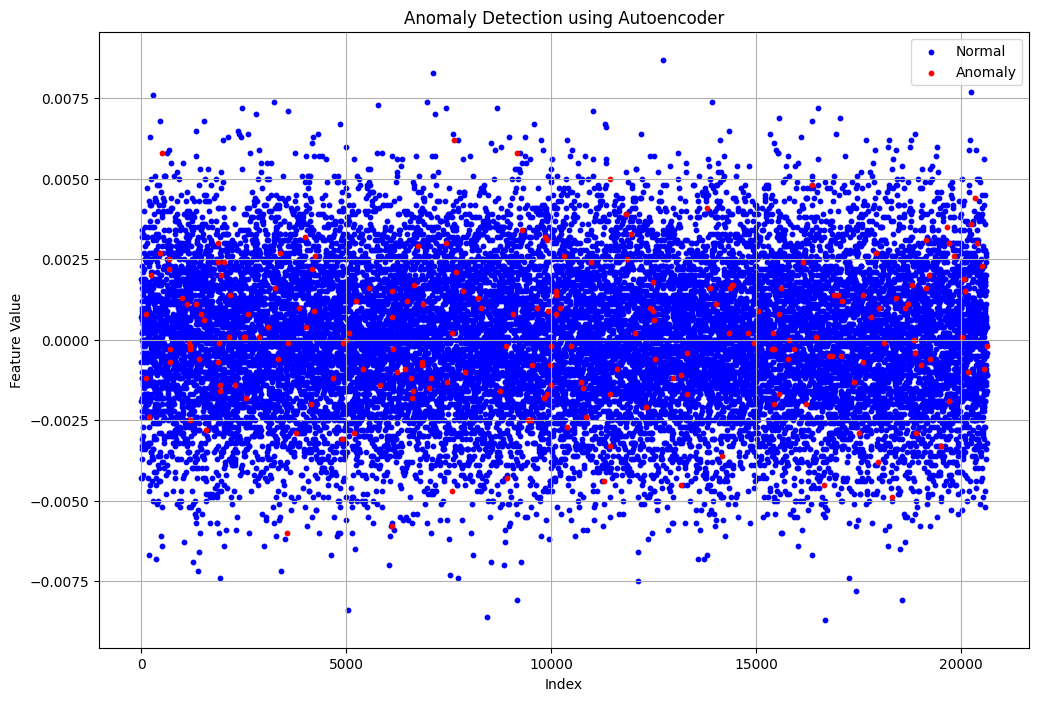

<Figure size 640x480 with 0 Axes>

In [24]:
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
import pickle
import joblib

# Load the data
data = pd.read_csv("/content/train_FD001.txt", sep="\s+", header=None)
ENAMING_DICT = {
    0: "engine_num", 1: "cycle_num", 2: "oper_set_1", 3: "oper_set_2", 4: "oper_set_3",
    5: "temp_fan_inlet", 6: "temp_lpc_outlet", 7: "temp_hpc_outlet", 8: "temp_lpt_outlet",
    9: "px_fan_inlet", 10: "px_by_duct", 11: "px_hpc_outlet", 12: "phys_fan_speed", 13: "phys_core_speed",
    14: "engine_px_ratio", 15: "stat_px_hpc_out", 16: "fuel_flow_ratio", 17: "corr_fan_speed",
    18: "corr_core_speed", 19: "bypass_ratio", 20: "fuel_air_ratio", 21: "bleed_enthalpy",
    22: "demanded_fan_speed", 23: "demanded_corr_fan_speed", 24: "hpt_coolant_bleed", 25: "lpt_coolant_bleed"
}
data.rename(columns=ENAMING_DICT, inplace=True)

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.drop(columns=["engine_num", "cycle_num"]))

# Define the autoencoder model
input_dim = data_scaled.shape[1]
encoding_dim = 14

input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation="tanh")(input_layer)
encoder = Dense(7, activation="relu")(encoder)
decoder = Dense(encoding_dim, activation="tanh")(encoder)
decoder = Dense(input_dim, activation="linear")(decoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder
autoencoder.fit(data_scaled, data_scaled, epochs=50, batch_size=32, shuffle=True, validation_split=0.2)

# Save the trained model as .h5
autoencoder.save('autoencoder_model.h5')
print("Model saved as autoencoder_model.h5")

# Save the trained model as .pkl using pickle
with open('autoencoder_model.pkl', 'wb') as file:
    pickle.dump(autoencoder, file)
print("Model saved as autoencoder_model.pkl")

# Save the trained model as .joblib using joblib
joblib.dump(autoencoder, 'autoencoder_model.joblib')
print("Model saved as autoencoder_model.joblib")

# Use the autoencoder to reconstruct the data
reconstructions = autoencoder.predict(data_scaled)
mse = np.mean(np.power(data_scaled - reconstructions, 2), axis=1)

# Determine the threshold for anomalies
threshold = np.percentile(mse, 99)
anomalies = mse > threshold

# Add the anomalies to the original dataframe
data['anomaly'] = anomalies.astype(int)

# Save the results
results_file = '../input_data_with_anomalies_tensorflow.csv'
data.to_csv(results_file, index=False)
print(f'Anomaly detection results have been saved to {results_file}')

# Plot the anomalies
plt.figure(figsize=(12, 8))
normal_data = data[data['anomaly'] == 0]
anomaly_data = data[data['anomaly'] == 1]

plt.scatter(normal_data.index, normal_data.iloc[:, 2], color='blue', label='Normal', s=10)
plt.scatter(anomaly_data.index, anomaly_data.iloc[:, 2], color='red', label='Anomaly', s=10)

plt.xlabel('Index')
plt.ylabel('Feature Value')
plt.title('Anomaly Detection using Autoencoder')
plt.legend()
plt.grid(True)
plt.show()

# Optionally, save the plot to a file
plt.savefig('../input_data_tensorflow_anomaly_detection_plot.png')


Epoch 1/50
516/516 [==============================] - 2s 3ms/step - loss: 0.3502 - val_loss: 0.2014
Epoch 2/50
516/516 [==============================] - 1s 2ms/step - loss: 0.1714 - val_loss: 0.1428
Epoch 3/50
516/516 [==============================] - 1s 2ms/step - loss: 0.1381 - val_loss: 0.1273
Epoch 4/50
516/516 [==============================] - 1s 2ms/step - loss: 0.1227 - val_loss: 0.1152
Epoch 5/50
516/516 [==============================] - 1s 2ms/step - loss: 0.1150 - val_loss: 0.1119
Epoch 6/50
516/516 [==============================] - 1s 3ms/step - loss: 0.1121 - val_loss: 0.1099
Epoch 7/50
516/516 [==============================] - 1s 2ms/step - loss: 0.1103 - val_loss: 0.1086
Epoch 8/50
516/516 [==============================] - 2s 3ms/step - loss: 0.1091 - val_loss: 0.1080
Epoch 9/50
516/516 [==============================] - 2s 4ms/step - loss: 0.1083 - val_loss: 0.1070
Epoch 10/50
516/516 [==============================] - 1s 3ms/step - loss: 0.1077 - val_loss: 0.1066

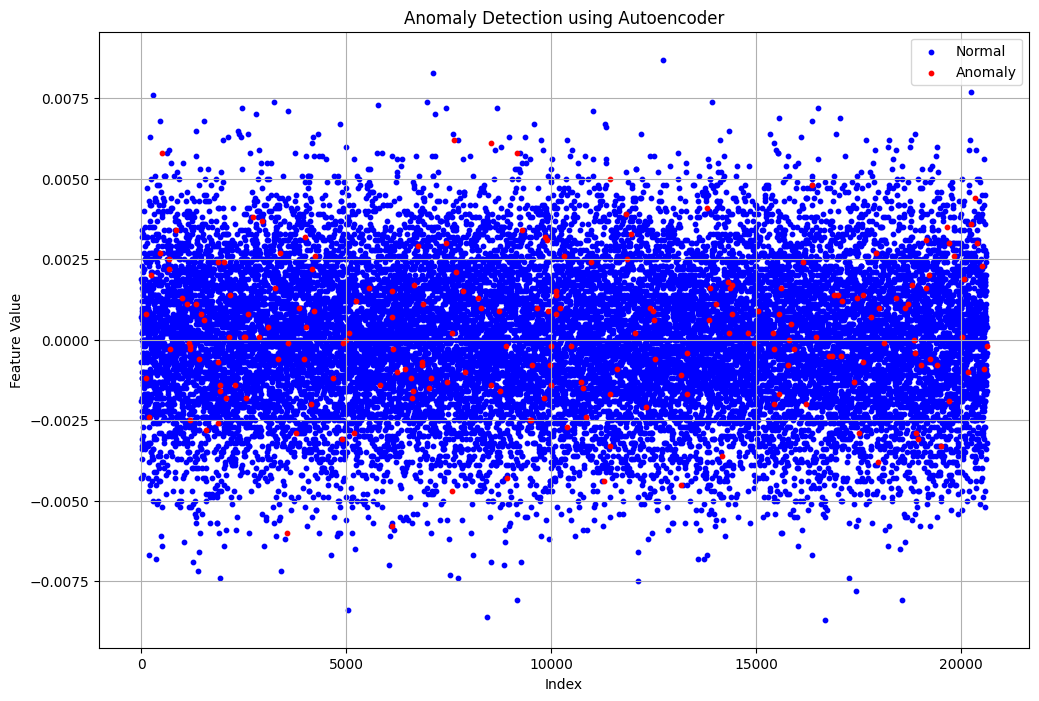

<Figure size 640x480 with 0 Axes>

In [23]:
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Load the data
data = pd.read_csv("/content/train_FD001.txt", sep="\s+", header=None)
ENAMING_DICT = {
    0: "engine_num", 1:"cycle_num", 2:"oper_set_1", 3:"oper_set_2", 4:"oper_set_3",
    5:"temp_fan_inlet", 6:"temp_lpc_outlet", 7:"temp_hpc_outlet", 8:"temp_lpt_outlet",
    9:"px_fan_inlet", 10:"px_by_duct", 11:"px_hpc_outlet", 12:"phys_fan_speed", 13:"phys_core_speed",
    14:"engine_px_ratio", 15:"stat_px_hpc_out", 16:"fuel_flow_ratio", 17:"corr_fan_speed",
    18:"corr_core_speed", 19:"bypass_ratio", 20:"fuel_air_ratio", 21:"bleed_enthalpy",
    22:"demanded_fan_speed", 23:"demanded_corr_fan_speed", 24:"hpt_coolant_bleed", 25:"lpt_coolant_bleed"
}
data.rename(columns=ENAMING_DICT, inplace=True)

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.drop(columns=["engine_num", "cycle_num"]))

# Define the autoencoder model
input_dim = data_scaled.shape[1]
encoding_dim = 14

input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation="tanh")(input_layer)
encoder = Dense(7, activation="relu")(encoder)
decoder = Dense(encoding_dim, activation="tanh")(encoder)
decoder = Dense(input_dim, activation="linear")(decoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder
autoencoder.fit(data_scaled, data_scaled, epochs=50, batch_size=32, shuffle=True, validation_split=0.2)

# Use the autoencoder to reconstruct the data
reconstructions = autoencoder.predict(data_scaled)
mse = np.mean(np.power(data_scaled - reconstructions, 2), axis=1)

# Determine the threshold for anomalies
threshold = np.percentile(mse, 99)
anomalies = mse > threshold

# Add the anomalies to the original dataframe
data['anomaly'] = anomalies.astype(int)

# Save the results
results_file = '../input_data_with_anomalies_tensorflow.csv'
data.to_csv(results_file, index=False)
print(f'Anomaly detection results have been saved to {results_file}')

# Plot the anomalies
plt.figure(figsize=(12, 8))
normal_data = data[data['anomaly'] == 0]
anomaly_data = data[data['anomaly'] == 1]

plt.scatter(normal_data.index, normal_data.iloc[:, 2], color='blue', label='Normal', s=10)
plt.scatter(anomaly_data.index, anomaly_data.iloc[:, 2], color='red', label='Anomaly', s=10)

plt.xlabel('Index')
plt.ylabel('Feature Value')
plt.title('Anomaly Detection using Autoencoder')
plt.legend()
plt.grid(True)
plt.show()

# Optionally, save the plot to a file
plt.savefig('../input_data_tensorflow_anomaly_detection_plot.png')


In [22]:
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import load_model
import joblib
import h5py

# Function to load and concatenate all CSV files in a directory
def load_data_from_directory(directory):
    if not os.path.exists(directory):
        print(f"Directory not found: {directory}")
        return pd.DataFrame()  # Return an empty DataFrame if directory does not exist

    files = [f for f in os.listdir(directory) if f.endswith('.csv')]
    if not files:
        print(f"No CSV files found in directory: {directory}")
    data_frames = [pd.read_csv(os.path.join(directory, file), header=None) for file in files]
    return pd.concat(data_frames, ignore_index=True) if data_frames else pd.DataFrame()

# Define directories
directories = ['../input_data_window_1', '../input_data_window_5', '../input_data_window_10', '../input_data_window_30']

# Load and concatenate data from all directories
all_data_frames = []
for directory in directories:
    df = load_data_from_directory(directory)
    if not df.empty:
        all_data_frames.append(df)

if not all_data_frames:
    raise ValueError("No data was loaded from any of the specified directories.")

all_data = pd.concat(all_data_frames, ignore_index=True)

# Check if all_data is empty after concatenation
if all_data.empty:
    raise ValueError("No data available after concatenation. Please check the directories and file paths.")

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(all_data)

# Define the autoencoder model
input_dim = data_scaled.shape[1]
encoding_dim = input_dim // 2  # Compress to half the input dimension

input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation="relu")(input_layer)
decoder = Dense(input_dim, activation="sigmoid")(encoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder
autoencoder.fit(data_scaled, data_scaled, epochs=50, batch_size=32, shuffle=True, validation_split=0.2)

# Save the model
model_file = '../autoencoder_model.h5'
autoencoder.save(model_file)
print(f'Model has been saved to {model_file}')

# Calculate reconstruction error
reconstructions = autoencoder.predict(data_scaled)
mse = np.mean(np.power(data_scaled - reconstructions, 2), axis=1)

# Determine the threshold for anomaly detection (e.g., 95th percentile)
threshold = np.percentile(mse, 95)
print(f'Anomaly detection threshold: {threshold}')

# Predict anomalies
anomalies = mse > threshold
all_data['anomaly'] = anomalies.astype(int)

# Save results to a new CSV file
results_file = '../input_data_with_anomalies.csv'
all_data.to_csv(results_file, index=False)
print(f'Anomaly detection results have been saved to {results_file}')

# Save the scaler and threshold for use in the API
joblib_file = '../scaler_and_threshold.pkl'
joblib.dump((scaler, threshold), joblib_file)
print(f'Scaler and threshold have been saved to {joblib_file}')

# Convert the autoencoder model to a format compatible with TensorFlow Serving
autoencoder.save('../autoencoder_model_tfserving')

# Save the autoencoder model in HDF5 format
autoencoder.save('../autoencoder_model.h5')
print('Model has been saved as HDF5 file: ../autoencoder_model.h5')

# Save the autoencoder model using joblib
joblib_file = '../autoencoder_model.joblib'
joblib.dump(autoencoder, joblib_file)
print(f'Model has been saved to {joblib_file}')


Epoch 1/50
2013/2013 [==============================] - 5s 2ms/step - loss: 0.5435 - val_loss: 0.4350
Epoch 2/50
2013/2013 [==============================] - 7s 4ms/step - loss: 0.4714 - val_loss: 0.4191
Epoch 3/50
2013/2013 [==============================] - 4s 2ms/step - loss: 0.4623 - val_loss: 0.4142
Epoch 4/50
2013/2013 [==============================] - 5s 2ms/step - loss: 0.4583 - val_loss: 0.4099
Epoch 5/50
2013/2013 [==============================] - 4s 2ms/step - loss: 0.4552 - val_loss: 0.4081
Epoch 6/50
2013/2013 [==============================] - 4s 2ms/step - loss: 0.4539 - val_loss: 0.4071
Epoch 7/50
2013/2013 [==============================] - 5s 2ms/step - loss: 0.4531 - val_loss: 0.4065
Epoch 8/50
2013/2013 [==============================] - 5s 2ms/step - loss: 0.4525 - val_loss: 0.4059
Epoch 9/50
2013/2013 [==============================] - 4s 2ms/step - loss: 0.4521 - val_loss: 0.4055
Epoch 10/50
2013/2013 [==============================] - 5s 2ms/step - loss: 0.451

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2517/2517 [==============================] - 4s 2ms/step
Anomaly detection threshold: 1.2524041076348986
Anomaly detection results have been saved to ../input_data_with_anomalies.csv
Scaler and threshold have been saved to ../scaler_and_threshold.pkl
Model has been saved as HDF5 file: ../autoencoder_model.h5
Model has been saved to ../autoencoder_model.joblib


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [21]:
import pandas as pd
import numpy as np
import joblib
import h5py
import os
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Function to load and concatenate all CSV files in a directory
def load_data_from_directory(directory):
    if not os.path.exists(directory):
        print(f"Directory not found: {directory}")
        return pd.DataFrame()  # Return an empty DataFrame if directory does not exist

    files = [f for f in os.listdir(directory) if f.endswith('.csv')]
    if not files:
        print(f"No CSV files found in directory: {directory}")
    data_frames = [pd.read_csv(os.path.join(directory, file), header=None) for file in files]
    return pd.concat(data_frames, ignore_index=True) if data_frames else pd.DataFrame()

# Define directories
directories = ['../input_data_window_1', '../input_data_window_5', '../input_data_window_10', '../input_data_window_30']

# Load and concatenate data from all directories
all_data_frames = []
for directory in directories:
    df = load_data_from_directory(directory)
    if not df.empty:
        all_data_frames.append(df)

if not all_data_frames:
    raise ValueError("No data was loaded from any of the specified directories.")

all_data = pd.concat(all_data_frames, ignore_index=True)

# Check if all_data is empty after concatenation
if all_data.empty:
    raise ValueError("No data available after concatenation. Please check the directories and file paths.")

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(all_data)

# Train Isolation Forest model
model = IsolationForest(contamination=0.01)
model.fit(data_scaled)

# Save the model using joblib
joblib_file = '../isolation_forest_model.pkl'
joblib.dump(model, joblib_file)
print(f'Model has been saved to {joblib_file}')

# Also save the model using joblib format
joblib_file = '../isolation_forest_model.joblib'
joblib.dump(model, joblib_file)
print(f'Model has been saved to {joblib_file}')

# Convert the joblib file to an HDF5 file
with open(joblib_file, 'rb') as f:
    model_data = f.read()

# Convert binary data to a numpy array of uint8
model_data_array = np.frombuffer(model_data, dtype=np.uint8)

# Save the numpy array to HDF5
with h5py.File('../isolation_forest_model.h5', 'w') as hf:
    hf.create_dataset('model', data=model_data_array)

print('Model has been saved as HDF5 file: ../isolation_forest_model.h5')


Model has been saved to ../isolation_forest_model.pkl
Model has been saved to ../isolation_forest_model.joblib
Model has been saved as HDF5 file: ../isolation_forest_model.h5


In [32]:
pip install h5py joblib


In [33]:
import pandas as pd
import numpy as np
import joblib
import h5py
import os
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Function to load and concatenate all CSV files in a directory
def load_data_from_directory(directory):
    if not os.path.exists(directory):
        print(f"Directory not found: {directory}")
        return pd.DataFrame()  # Return an empty DataFrame if directory does not exist

    files = [f for f in os.listdir(directory) if f.endswith('.csv')]
    if not files:
        print(f"No CSV files found in directory: {directory}")
    data_frames = [pd.read_csv(os.path.join(directory, file), header=None) for file in files]
    return pd.concat(data_frames, ignore_index=True) if data_frames else pd.DataFrame()

# Define directories
directories = ['../input_data_window_1', '../input_data_window_5', '../input_data_window_10', '../input_data_window_30']

# Load and concatenate data from all directories
all_data_frames = []
for directory in directories:
    df = load_data_from_directory(directory)
    if not df.empty:
        all_data_frames.append(df)

if not all_data_frames:
    raise ValueError("No data was loaded from any of the specified directories.")

all_data = pd.concat(all_data_frames, ignore_index=True)

# Check if all_data is empty after concatenation
if all_data.empty:
    raise ValueError("No data available after concatenation. Please check the directories and file paths.")

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(all_data)

# Train Isolation Forest model
model = IsolationForest(contamination=0.01)
model.fit(data_scaled)

# Save the model using joblib
joblib_file = '../isolation_forest_model.pkl'
joblib.dump(model, joblib_file)
print(f'Model has been saved to {joblib_file}')

# Convert the joblib file to an HDF5 file
with open(joblib_file, 'rb') as f:
    model_data = f.read()

# Convert binary data to a numpy array of uint8
model_data_array = np.frombuffer(model_data, dtype=np.uint8)

# Save the numpy array to HDF5
with h5py.File('../isolation_forest_model.h5', 'w') as hf:
    hf.create_dataset('model', data=model_data_array)

print('Model has been saved as HDF5 file: ../isolation_forest_model.h5')

# Optionally, remove the intermediate joblib file
os.remove(joblib_file)


Model has been saved to ../isolation_forest_model.pkl
Model has been saved as HDF5 file: ../isolation_forest_model.h5


In [35]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import os
import pickle
import joblib

# Existing code for loading, preprocessing, and training...

# Convert column names to strings if necessary
data.columns = data.columns.astype(str)

# Ensure all data in the DataFrame is numeric before scaling
# Convert all non-numeric columns to numeric, forcing errors to NaN, then drop them
data = data.apply(pd.to_numeric, errors='coerce')
data = data.dropna()

# Separate features from the target if needed (e.g., if you have a target column)
# Here, assuming no target column and all columns are features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Train the Isolation Forest model
model = IsolationForest(contamination=0.01)
model.fit(data_scaled)

# Save model to .pkl file using pickle
with open('isolationforest.pkl', 'wb') as file:
    pickle.dump(model, file)

print('Model saved as isolationforest.pkl')

# Save model to .h5 file using joblib
joblib.dump(model, 'isolationforest.h5', compress=3)

print('Model saved as isolationforest.h5')


Model saved as isolationforest.pkl
Model saved as isolationforest.h5


In [36]:
import sklearn
import joblib

print(f"scikit-learn version: {sklearn.__version__}")
print(f"joblib version: {joblib.__version__}")


scikit-learn version: 1.2.2
joblib version: 1.4.2


In [37]:
import joblib
from sklearn.ensemble import IsolationForest
import numpy as np

# Example data
data = np.random.rand(100, 2)

# Train the model
model = IsolationForest()
model.fit(data)

# Save the model
joblib.dump(model, 'isolationforest.pkl')


['isolationforest.pkl']

In [38]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import joblib

# Generate example data
np.random.seed(42)  # For reproducibility
data = np.random.rand(100, 2)  # 100 samples, 2 features

# Create a DataFrame for better readability
df = pd.DataFrame(data, columns=['feature_1', 'feature_2'])

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

# Train the Isolation Forest model
model = IsolationForest(contamination=0.01)
model.fit(data_scaled)

# Save the model using joblib
joblib.dump(model, 'isolationforest.joblib', compress=3)
print('Model saved as isolationforest.joblib')


Model saved as isolationforest.joblib


In [39]:
import os
print("Current working directory:", os.getcwd())


Current working directory: /content
